# 라이브러리 불러오기

In [4]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd

from sklearn.metrics import accuracy_score

# 데이터 불러오기

In [5]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

id = 0
다음 그림은 숫자 5 입니다.


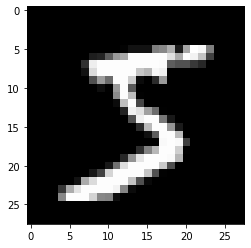

In [7]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

# id = rd.randrange(0,10000)
id = 0

print(f'id = {id}')
print(f'다음 그림은 숫자 {train_y[id]} 입니다.')

plt.imshow(train_x[id], cmap='gray')
plt.show()

# 데이터 전처리

## scaling

In [8]:
print('max : ', train_x.max() )
print('min : ', train_x.min() )

max :  255
min :  0


In [9]:
max_num = train_x.max()
min_num = train_x.min()

train_x = (train_x - min_num) / (max_num - min_num)
test_x = (test_x - min_num) / (max_num - min_num)

In [10]:
print('max : ', train_x.max() )
print('min : ', train_x.min() )

max :  1.0
min :  0.0


## one hot encoding

In [11]:
from tensorflow.keras.utils import to_categorical

In [14]:
n_class = len(np.unique(train_y))

train_y = to_categorical(train_y,n_class)
test_y = to_categorical(test_y,n_class)

# 모델링

In [25]:
#레이어 선언
shape_size = tuple(train_x.shape[i] for i in range(1,len(train_x.shape)))

il = keras.layers.Input(shape=shape_size)
fl = keras.layers.Flatten()(il)
ol = keras.layers.Dense(n_class,'softmax')(fl)

#모델 선언
model = keras.models.Model(il,ol)

#모델 컴파일
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

#모델 확인
model.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## EarlySopping

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
es = EarlyStopping(monitor = 'val_loss',
                   min_delta=0,
                   patience=5,
                   verbose=1,
                   restore_best_weights=True)

## 모델학습

In [26]:
model.fit(train_x,train_y,
          verbose=1,epochs=10,
          callbacks=[es],
          validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5062 - accuracy: 0.8714 - val_loss: 0.3166 - val_accuracy: 0.9147
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3177 - accuracy: 0.9121 - val_loss: 0.2840 - val_accuracy: 0.9209
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2929 - accuracy: 0.9181 - val_loss: 0.2762 - val_accuracy: 0.9227
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2809 - accuracy: 0.9214 - val_loss: 0.2718 - val_accuracy: 0.9253
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2738 - accuracy: 0.9226 - val_loss: 0.2689 - val_accuracy: 0.9274
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2681 - accuracy: 0.9251 - val_loss: 0.2648 - val_accuracy: 0.9282
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2638 - accuracy: 0.9263 - val_loss: 0.2680 - val_accuracy:

In [27]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

pred_train_argmax = pred_train.argmax(axis=1)
pred_test_argmax = pred_test.argmax(axis=1)

train_accuracy = accuracy_score(train_y.argmax(axis=1),pred_train_argmax)
test_accuracy = accuracy_score(test_y.argmax(axis=1),pred_test_argmax)

print("train data 정확도 : ",train_accuracy*100,'%')
print("test data 정확도 : ",test_accuracy*100,'%')

train data 정확도 :  93.11 %
test data 정확도 :  92.75 %
